In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [37]:
df = pd.read_csv('TSLA_2.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
1,2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000
2,2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500
3,2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500
4,2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500
...,...,...,...,...,...,...,...
1253,2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
1254,2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600
1255,2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700
1256,2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44652800


In [38]:
df.set_index('Date',drop=True,inplace=True)

In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000
2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500
2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500
2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500
...,...,...,...,...,...,...
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600
2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700


In [40]:
df = df[['Open','High','Low','Close','Adj Close','Volume']]

In [41]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000
2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500
2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500
2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500
...,...,...,...,...,...,...
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600
2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700


In [42]:
df_for_training = df.astype(float)

In [43]:
scalar = StandardScaler()
scalar.fit(df_for_training)
df_for_training_scaled = scalar.transform(df_for_training)

In [44]:
df_for_training_scaled

array([[-0.48148295, -0.48358339, -0.47853855, -0.47842568, -0.47842568,
        -0.83019482],
       [-0.48051722, -0.47977886, -0.4757942 , -0.47908679, -0.47908679,
        -0.74548766],
       [-0.47958297, -0.48381923, -0.48704172, -0.4859183 , -0.4859183 ,
        -0.40501057],
       ...,
       [ 2.85364412,  2.86911833,  2.93712924,  2.93773403,  2.93773403,
        -0.49157183],
       [ 2.99535492,  3.16753284,  3.09147162,  3.25433385,  3.25433385,
         0.01494435],
       [ 3.29977072,  3.25874911,  3.18530924,  3.09645363,  3.09645363,
         0.15277057]])

In [45]:
y = [x[0] for x in df_for_training_scaled] 

In [46]:
split = int(len(df_for_training_scaled)*0.75)
print(split)

943


In [47]:
X_train = df_for_training_scaled[:split]
X_test = df_for_training_scaled[split:len(df_for_training_scaled)]
Y_train = y[:split]
Y_test = y[split:len(y)]

In [48]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(X_test))

943
315
943
315


In [49]:
n = 15 # Looking 15 days in the past
Xtrain,Xtest,Ytrain,Ytest = [],[],[],[]

for i in range(n,len(X_train)):
    Xtrain.append(X_train[i-n:i,:X_train.shape[1]])
    Ytrain.append(Y_train[i])  # predicting next record
    
for i in range(n,len(X_test)):
    Xtest.append(X_test[i-n:i,:X_test.shape[1]])
    Ytest.append(Y_test[i])  # Predicting next record

In [50]:
df.head(16)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000
2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500
2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500
2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500
2016-04-22,49.778000,50.799999,49.141998,50.750000,50.750000,18931500
2016-04-25,50.602001,51.476002,50.152000,50.363998,50.363998,18351500
2016-04-26,50.410000,51.146000,49.877998,50.748001,50.748001,16119000
2016-04-27,50.549999,51.000000,49.880001,50.293999,50.293999,16029000


In [51]:
val = Ytrain[0]
val 

-0.5239332106097658

In [52]:
print(scalar.inverse_transform(np.c_[val,np.zeros(val.shape),np.zeros(val.shape),np.zeros(val.shape),np.zeros(val.shape),np.zeros(val.shape)])) # same as the 16th element

[[4.21740000e+01 1.45233637e+02 1.38405118e+02 1.42084044e+02
  1.42084044e+02 4.41949804e+07]]


In [53]:
# We need the obs, timeSteps and the no of features for our LSTM
Xtrain,Ytrain = (np.array(Xtrain),np.array(Ytrain))
Xtest,Ytest = (np.array(Xtest),np.array(Ytest))

In [54]:
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))
Xtest = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

In [55]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(928, 15, 6)
(300, 15, 6)
(928,)
(300,)


In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [57]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dropout(0.2))
          
model.add(LSTM(100,return_sequences=True,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dropout(0.4))
          
model.add(LSTM(150,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dropout(0.5))
          
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.fit(Xtrain,Ytrain,epochs=100,validation_data=(Xtest,Ytest),batch_size=32)

Epoch 1/100
29/29 [==============================] - 11s 168ms/step - loss: 0.0428 - val_loss: 1.3525
Epoch 2/100
29/29 [==============================] - 1s 46ms/step - loss: 0.0041 - val_loss: 1.1938
Epoch 3/100
29/29 [==============================] - 1s 48ms/step - loss: 0.0035 - val_loss: 1.2264
Epoch 4/100
29/29 [==============================] - 1s 46ms/step - loss: 0.0032 - val_loss: 1.1941
Epoch 5/100
29/29 [==============================] - 2s 55ms/step - loss: 0.0028 - val_loss: 1.1534
Epoch 6/100
29/29 [==============================] - 1s 51ms/step - loss: 0.0028 - val_loss: 1.0935
Epoch 7/100
29/29 [==============================] - 1s 49ms/step - loss: 0.0031 - val_loss: 0.9928
Epoch 8/100
29/29 [==============================] - 1s 46ms/step - loss: 0.0028 - val_loss: 0.9567
Epoch 9/100
29/29 [==============================] - 1s 49ms/step - loss: 0.0026 - val_loss: 0.9806
Epoch 10/100
29/29 [==============================] - 2s 64ms/step - loss: 0.0024 - val_loss: 0.94

29/29 [==============================] - 1s 51ms/step - loss: 5.5927e-04 - val_loss: 1.5833
Epoch 82/100
29/29 [==============================] - 1s 47ms/step - loss: 5.8997e-04 - val_loss: 1.9341e-
Epoch 83/100
29/29 [==============================] - 1s 47ms/step - loss: 5.8928e-04 - val_loss: 1.9628
Epoch 84/100
29/29 [==============================] - 1s 50ms/step - loss: 5.1579e-04 - val_loss: 2.1261
Epoch 85/100
29/29 [==============================] - 1s 48ms/step - loss: 4.9779e-04 - val_loss: 2.0036
Epoch 86/100
29/29 [==============================] - 2s 55ms/step - loss: 4.8454e-04 - val_loss: 2.0063
Epoch 87/100
29/29 [==============================] - 1s 45ms/step - loss: 4.9279e-04 - val_loss: 1.9614
Epoch 88/100
29/29 [==============================] - 2s 58ms/step - loss: 4.6319e-04 - val_loss: 2.1078
Epoch 89/100
29/29 [==============================] - 2s 52ms/step - loss: 4.5360e-04 - val_loss: 2.0746
Epoch 90/100
29/29 [==============================] - 2s 57ms/step

In [58]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [59]:
trainPredict = np.c_[trainPredict,np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict,np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape)]

In [60]:
trainPredict = scalar.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

In [61]:
testPredict = scalar.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [62]:
Ytrain = np.c_[Ytrain,np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape)]
Ytest = np.c_[Ytest,np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape)]

In [63]:
Ytrain = scalar.inverse_transform(Ytrain)
Ytrain =  [x[0] for x in Ytrain] 

Ytest = scalar.inverse_transform(Ytest)
Ytest =  [x[0] for x in Ytest]

<function matplotlib.pyplot.show(close=None, block=None)>

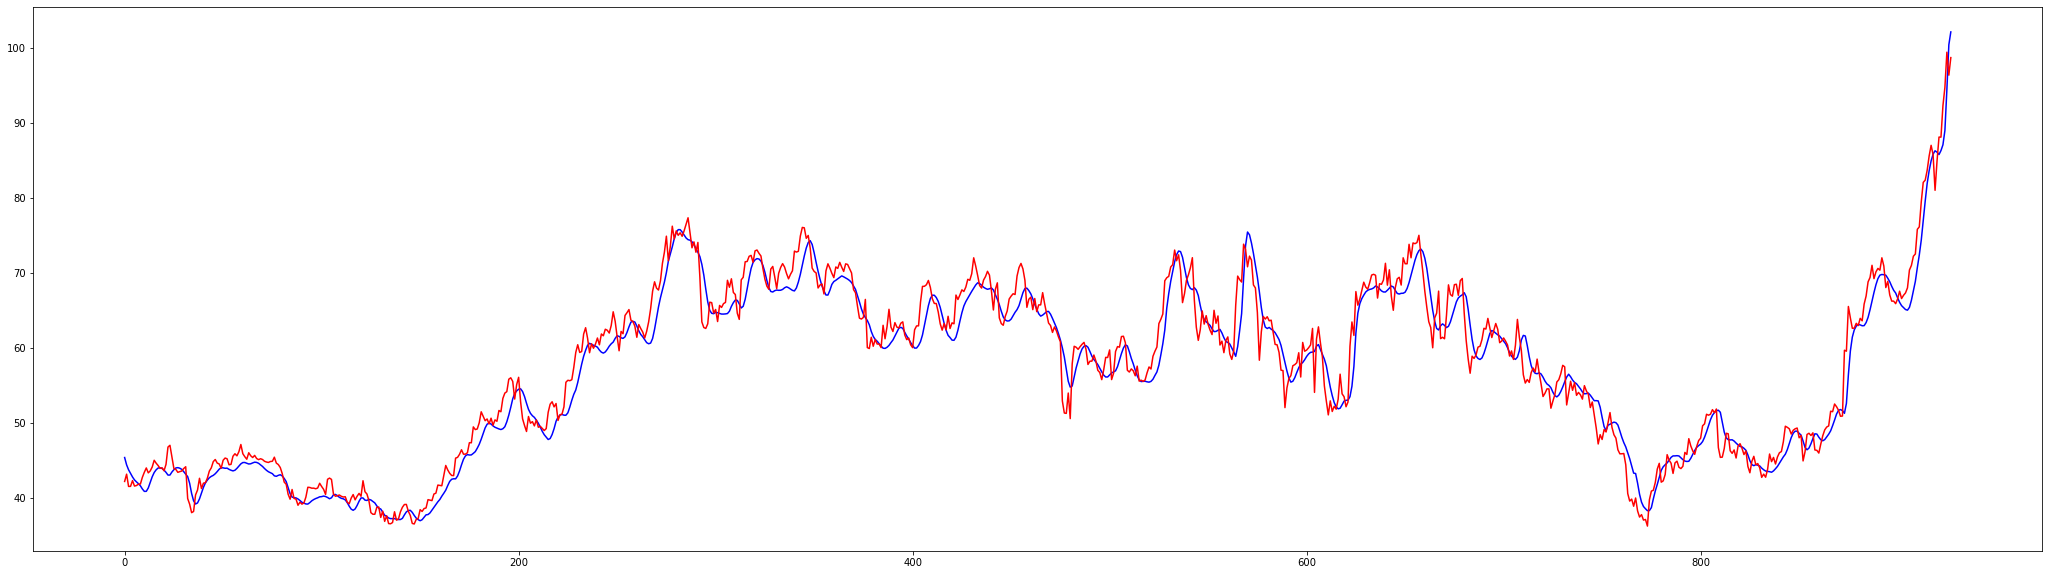

In [64]:
# Plotting the train presict
plt.figure(figsize=(36,10))
plt.plot(trainPredict,color='blue')
plt.plot(Ytrain,color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

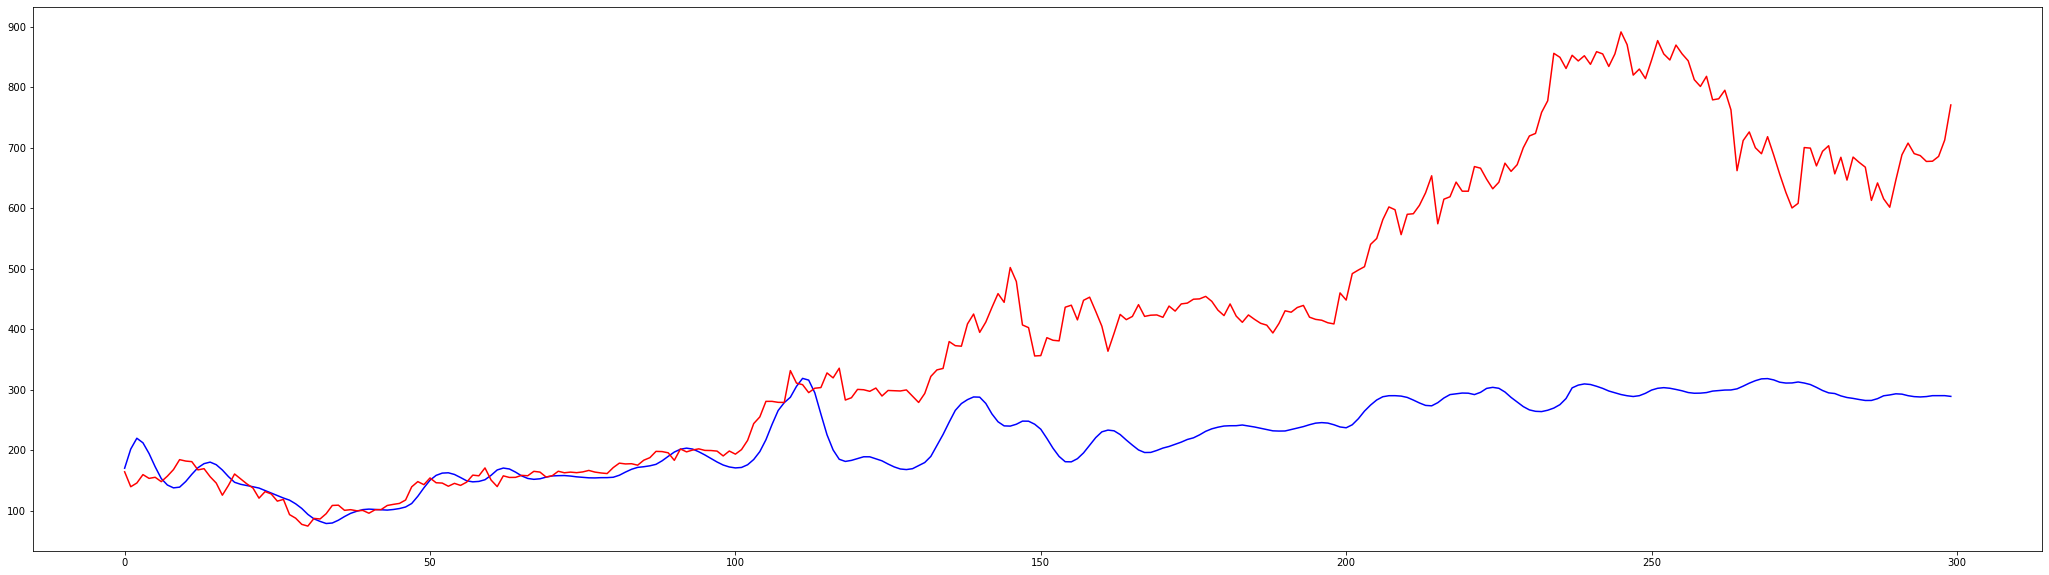

In [65]:
# Plotting the train presict
plt.figure(figsize=(36,10))
plt.plot(testPredict,color='blue')
plt.plot(Ytest,color='red')
plt.show

In [124]:
df['open_returns'] = df.Open.pct_change()

In [125]:
# Using log returns for pattern analysis
df['open_log_returns'] = np.log(1+df['open_returns'])

In [126]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,open_returns,open_log_returns,High_returns,High_log_returns,Low_returns,Low_log_returns,Close_returns,Close_log_returns,Volume_returns,Volume_log_returns
Date,,,,,,,,,,,,,,,,
2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500,NaN,NaN,-0.015253,-0.015370,-0.041365,-0.042245,-0.025642,-0.025977,0.488388,0.397694
2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500,-0.027102,-0.027476,-0.002791,-0.002795,0.001036,0.001036,0.010511,0.010456,-0.182996,-0.202112
2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500,0.011086,0.011025,-0.010881,-0.010940,0.022402,0.022154,-0.006721,-0.006743,-0.464181,-0.623958
2016-04-22,49.778000,50.799999,49.141998,50.750000,50.750000,18931500,-0.000402,-0.000402,0.012356,0.012280,-0.004860,-0.004872,0.021990,0.021752,0.360461,0.307824
2016-04-25,50.602001,51.476002,50.152000,50.363998,50.363998,18351500,0.016554,0.016418,0.013307,0.013219,0.020553,0.020344,-0.007606,-0.007635,-0.030637,-0.031116


In [127]:
def log_returns(df,column,newColumn,newColumn1):
    df[newColumn] = df[column].pct_change()
    df[newColumn1] = np.log(1+df[newColumn])

In [128]:
log_returns(df,'High','High_returns','High_log_returns')


In [129]:
log_returns(df,'Low','Low_returns','Low_log_returns')
log_returns(df,'Close','Close_returns','Close_log_returns')
log_returns(df,'Volume','Volume_returns','Volume_log_returns')

In [130]:
df

,Open,High,Low,Close,Adj Close,Volume,open_returns,open_log_returns,High_returns,High_log_returns,Low_returns,Low_log_returns,Close_returns,Close_log_returns,Volume_returns,Volume_log_returns
Date,,,,,,,,,,,,,,,,
2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500,-0.027102,-0.027476,-0.002791,-0.002795,0.001036,0.001036,0.010511,0.010456,-0.182996,-0.202112
2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500,0.011086,0.011025,-0.010881,-0.010940,0.022402,0.022154,-0.006721,-0.006743,-0.464181,-0.623958
2016-04-22,49.778000,50.799999,49.141998,50.750000,50.750000,18931500,-0.000402,-0.000402,0.012356,0.012280,-0.004860,-0.004872,0.021990,0.021752,0.360461,0.307824
2016-04-25,50.602001,51.476002,50.152000,50.363998,50.363998,18351500,0.016554,0.016418,0.013307,0.013219,0.020553,0.020344,-0.007606,-0.007635,-0.030637,-0.031116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300,-0.014003,-0.014102,-0.002647,-0.002650,0.005705,0.005689,0.019122,0.018941,-0.090656,-0.095032
2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600,0.000576,0.000576,-0.012443,-0.012521,-0.003305,-0.003311,-0.009915,-0.009965,-0.105403,-0.111382
2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700,0.011700,0.011632,0.034994,0.034396,0.018912,0.018735,0.036867,0.036204,0.361316,0.308452


In [131]:
df.dropna(inplace=True)
X = X = df[['Close','Close_log_returns','Open','open_log_returns','High','High_log_returns','Low','Low_log_returns','Volume','Volume_log_returns']].values

In [132]:
X

array([[ 4.99939990e+01,  1.04557194e-02,  4.92519990e+01, ...,
         1.03571217e-03,  2.59705000e+07, -2.02111852e-01],
       [ 4.96580010e+01, -6.74345268e-03,  4.97980000e+01, ...,
         2.21544454e-02,  1.39155000e+07, -6.23957952e-01],
       [ 5.07500000e+01,  2.17520924e-02,  4.97780000e+01, ...,
        -4.87195972e-03,  1.89315000e+07,  3.07823875e-01],
       ...,
       [ 7.01979980e+02,  3.62040410e-02,  6.85700012e+02, ...,
         1.87350600e-02,  2.91357000e+07,  3.08451816e-01],
       [ 7.62320007e+02,  8.24615391e-02,  7.12700012e+02, ...,
         4.10324242e-02,  4.46528000e+07,  4.26952789e-01],
       [ 7.32229980e+02, -4.02717793e-02,  7.70700012e+02, ...,
         2.41482183e-02,  4.88751000e+07,  9.03510490e-02]])

In [133]:
scalar = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = scalar.transform(X)

In [134]:
y = [x[0] for x in X_scaled] # Y will be first item in the list which is our prices/log returns

In [135]:
split = int(len(X_scaled)*0.75)
print(split)

941


In [136]:
X_train = X_scaled[:split]
X_test = X_scaled[split:len(X_scaled)]
Y_train = y[:split]
Y_test = y[split:len(y)]

In [137]:
n = 15 # Looking 15 days in the past
Xtrain,Xtest,Ytrain,Ytest = [],[],[],[]

for i in range(n,len(X_train)):
    Xtrain.append(X_train[i-n:i,:X_train.shape[1]])
    Ytrain.append(Y_train[i])  # predicting next record
    
for i in range(n,len(X_test)):
    Xtest.append(X_test[i-n:i,:X_test.shape[1]])
    Ytest.append(Y_test[i])  # Predicting next record

In [138]:
df.head(16)

,Open,High,Low,Close,Adj Close,Volume,open_returns,open_log_returns,High_returns,High_log_returns,Low_returns,Low_log_returns,Close_returns,Close_log_returns,Volume_returns,Volume_log_returns
Date,,,,,,,,,,,,,,,,
2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500,-0.027102,-0.027476,-0.002791,-0.002795,0.001036,0.001036,0.010511,0.010456,-0.182996,-0.202112
2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500,0.011086,0.011025,-0.010881,-0.010940,0.022402,0.022154,-0.006721,-0.006743,-0.464181,-0.623958
2016-04-22,49.778000,50.799999,49.141998,50.750000,50.750000,18931500,-0.000402,-0.000402,0.012356,0.012280,-0.004860,-0.004872,0.021990,0.021752,0.360461,0.307824
2016-04-25,50.602001,51.476002,50.152000,50.363998,50.363998,18351500,0.016554,0.016418,0.013307,0.013219,0.020553,0.020344,-0.007606,-0.007635,-0.030637,-0.031116
2016-04-26,50.410000,51.146000,49.877998,50.748001,50.748001,16119000,-0.003794,-0.003802,-0.006411,-0.006431,-0.005463,-0.005478,0.007625,0.007596,-0.121652,-0.129713
2016-04-27,50.549999,51.000000,49.880001,50.293999,50.293999,16029000,0.002777,0.002773,-0.002855,-0.002859,0.000040,0.000040,-0.008946,-0.008986,-0.005583,-0.005599
2016-04-28,49.970001,50.686001,49.487999,49.542000,49.542000,12595000,-0.011474,-0.011540,-0.006157,-0.006176,-0.007859,-0.007890,-0.014952,-0.015065,-0.214237,-0.241100
2016-04-29,49.627998,49.686001,47.562000,48.152000,48.152000,27069000,-0.006844,-0.006868,-0.019729,-0.019927,-0.038919,-0.039696,-0.028057,-0.028458,1.149186,0.765089
2016-05-02,48.299999,48.638000,46.964001,48.360001,48.360001,19219500,-0.026759,-0.027124,-0.021092,-0.021318,-0.012573,-0.012653,0.004320,0.004310,-0.289981,-0.342464


In [139]:
# We need the obs, timeSteps and the no of features for our LSTM
Xtrain,Ytrain = (np.array(Xtrain),np.array(Ytrain))
Xtest,Ytest = (np.array(Xtest),np.array(Ytest))

In [140]:
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))
Xtest = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

In [141]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(926, 15, 10)
(299, 15, 10)
(926,)
(299,)


In [142]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [143]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dropout(0.2))
          
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(200,return_sequences=True))
model.add(Dropout(0.4))
          
model.add(LSTM(250))
model.add(Dropout(0.5))
          
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.fit(Xtrain,Ytrain,epochs=100,validation_data=(Xtest,Ytest),batch_size=32)

Epoch 1/100
29/29 [==============================] - 19s 222ms/step - loss: 0.0011 - val_loss: 0.2508
Epoch 2/100
29/29 [==============================] - 4s 130ms/step - loss: 2.2462e-04 - val_loss: 0.2332
Epoch 3/100
29/29 [==============================] - 4s 129ms/step - loss: 1.8388e-04 - val_loss: 0.1403
Epoch 4/100
29/29 [==============================] - 4s 137ms/step - loss: 1.2699e-04 - val_loss: 0.0514
Epoch 5/100
29/29 [==============================] - 4s 136ms/step - loss: 6.5662e-05 - val_loss: 0.0675
Epoch 6/100
29/29 [==============================] - 4s 131ms/step - loss: 6.5522e-05 - val_loss: 0.0696
Epoch 7/100
29/29 [==============================] - 4s 137ms/step - loss: 6.1416e-05 - val_loss: 0.0700
Epoch 8/100
29/29 [==============================] - 4s 136ms/step - loss: 5.2329e-05 - val_loss: 0.0800
Epoch 9/100
29/29 [==============================] - 4s 134ms/step - loss: 5.5287e-05 - val_loss: 0.0748
Epoch 10/100
29/29 [==============================] - 4s 1

29/29 [==============================] - 4s 131ms/step - loss: 1.1459e-05 - val_loss: 0.0071
Epoch 79/100
29/29 [==============================] - 4s 129ms/step - loss: 1.3440e-05 - val_loss: 0.0105
Epoch 80/100
29/29 [==============================] - 4s 130ms/step - loss: 1.2662e-05 - val_loss: 0.0129
Epoch 81/100
29/29 [==============================] - 4s 153ms/step - loss: 1.4928e-05 - val_loss: 0.0092
Epoch 82/100
29/29 [==============================] - 4s 137ms/step - loss: 1.1864e-05 - val_loss: 0.0098
Epoch 83/100
29/29 [==============================] - 4s 138ms/step - loss: 1.2734e-05 - val_loss: 0.0111
Epoch 84/100
29/29 [==============================] - 4s 142ms/step - loss: 1.2275e-05 - val_loss: 0.0077
Epoch 85/100
29/29 [==============================] - 4s 142ms/step - loss: 1.2255e-05 - val_loss: 0.0063
Epoch 86/100
29/29 [==============================] - 4s 143ms/step - loss: 1.3195e-05 - val_loss: 0.0106
Epoch 87/100
29/29 [==============================] - 4s 13

In [144]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [145]:
trainPredict = np.c_[trainPredict,np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape),np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict,np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape),np.zeros(testPredict.shape)]

In [146]:
trainPredict = scalar.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

In [147]:
testPredict = scalar.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [148]:
Ytrain = np.c_[Ytrain,np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape),np.zeros(Ytrain.shape)]
Ytest = np.c_[Ytest,np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape),np.zeros(Ytest.shape)]

In [149]:
Ytrain = scalar.inverse_transform(Ytrain)
Ytrain =  [x[0] for x in Ytrain] 

Ytest = scalar.inverse_transform(Ytest)
Ytest =  [x[0] for x in Ytest]

<function matplotlib.pyplot.show(close=None, block=None)>

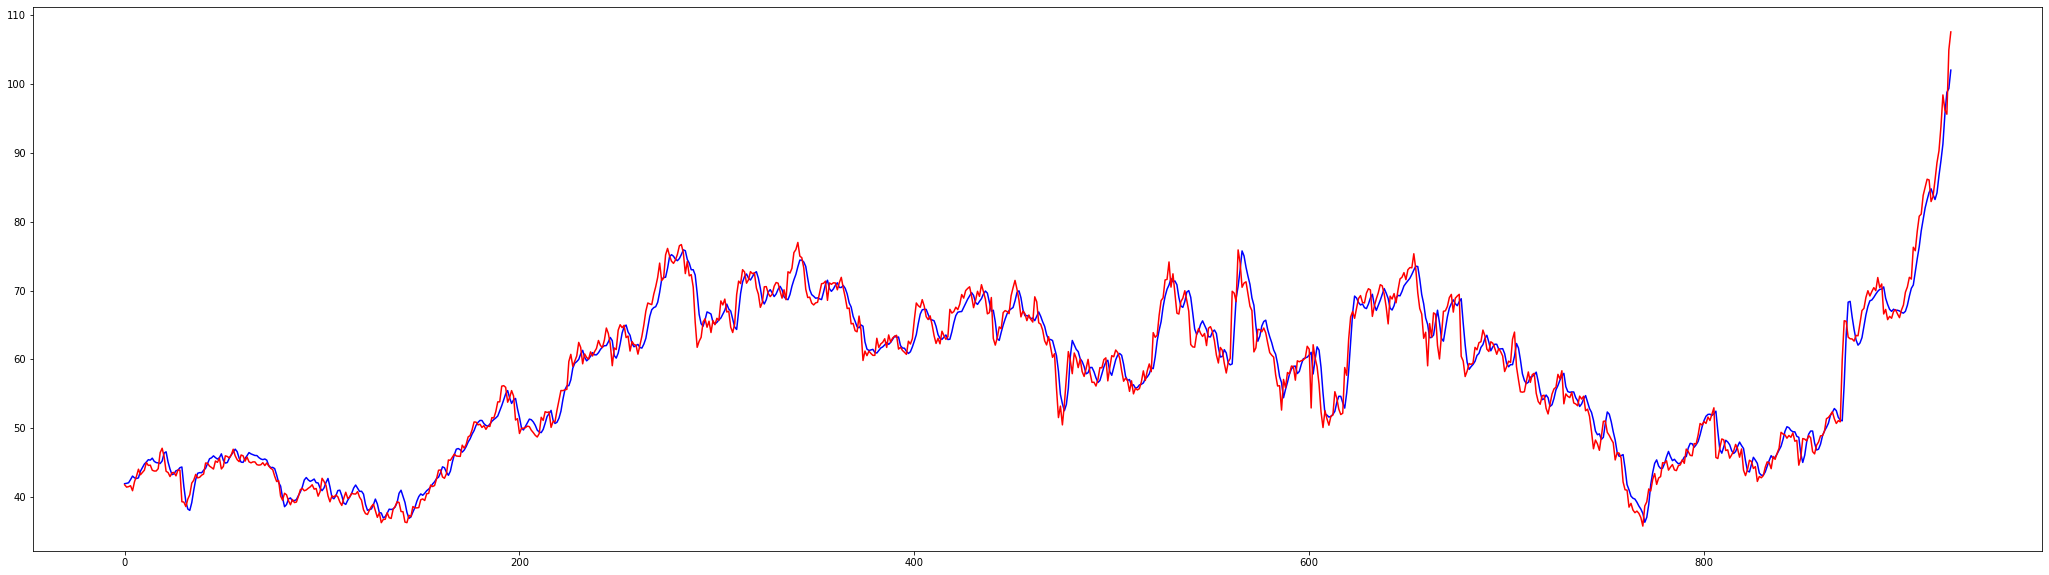

In [150]:
# Plotting the train presict
plt.figure(figsize=(36,10))
plt.plot(trainPredict,color='blue')
plt.plot(Ytrain,color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

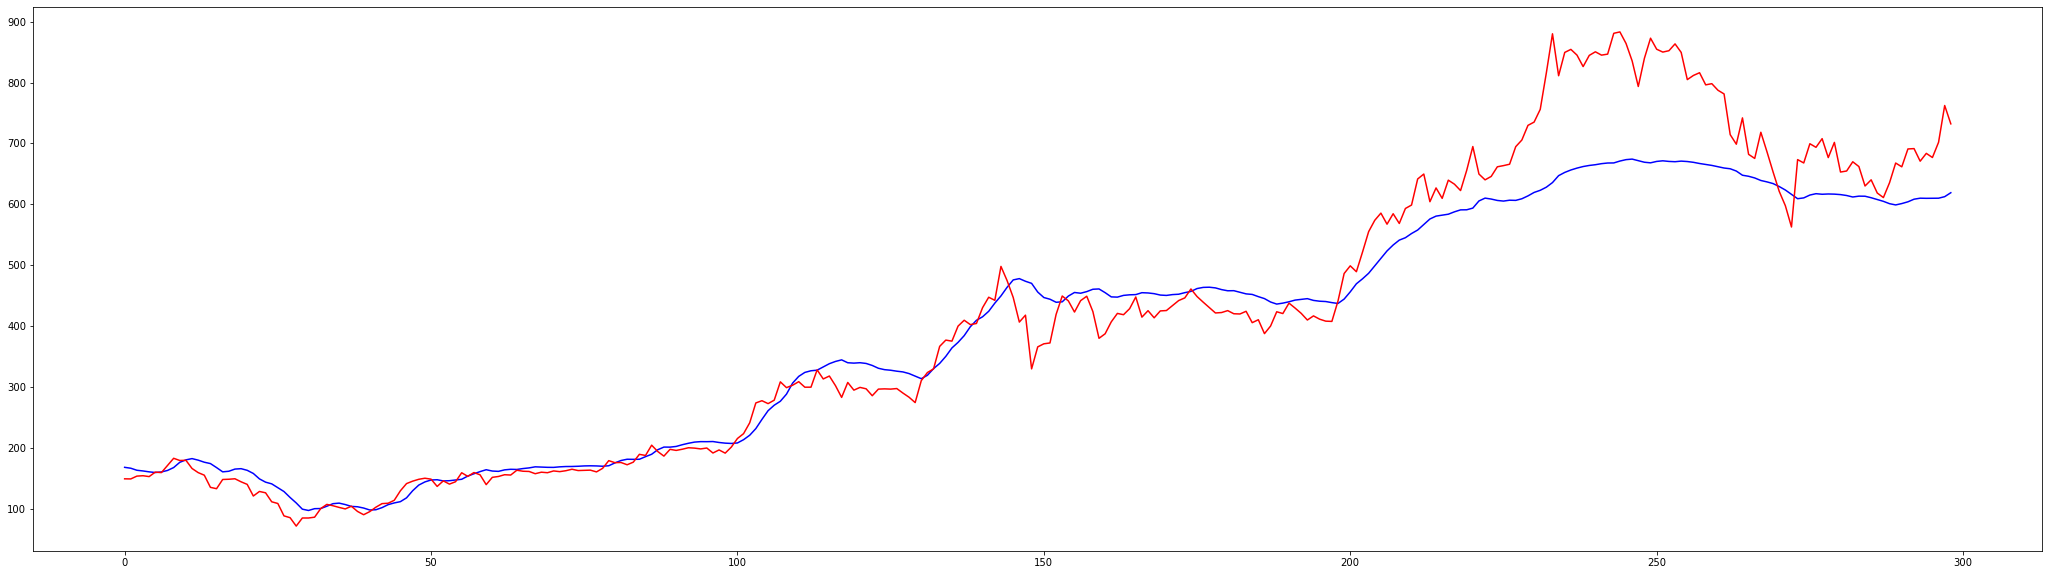

In [151]:
# Plotting the train presict
plt.figure(figsize=(36,10))
plt.plot(testPredict,color='blue')
plt.plot(Ytest,color='red')
plt.show